# Task 3: Heart Disease Prediction  

## Importing important Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


## Loading Dataset

In [2]:
df = pd.read_csv('heart-disease.csv')

## Data Exploration

In [3]:
df.sample(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Data Visualization

### pairplot

C:\Users\kHaN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


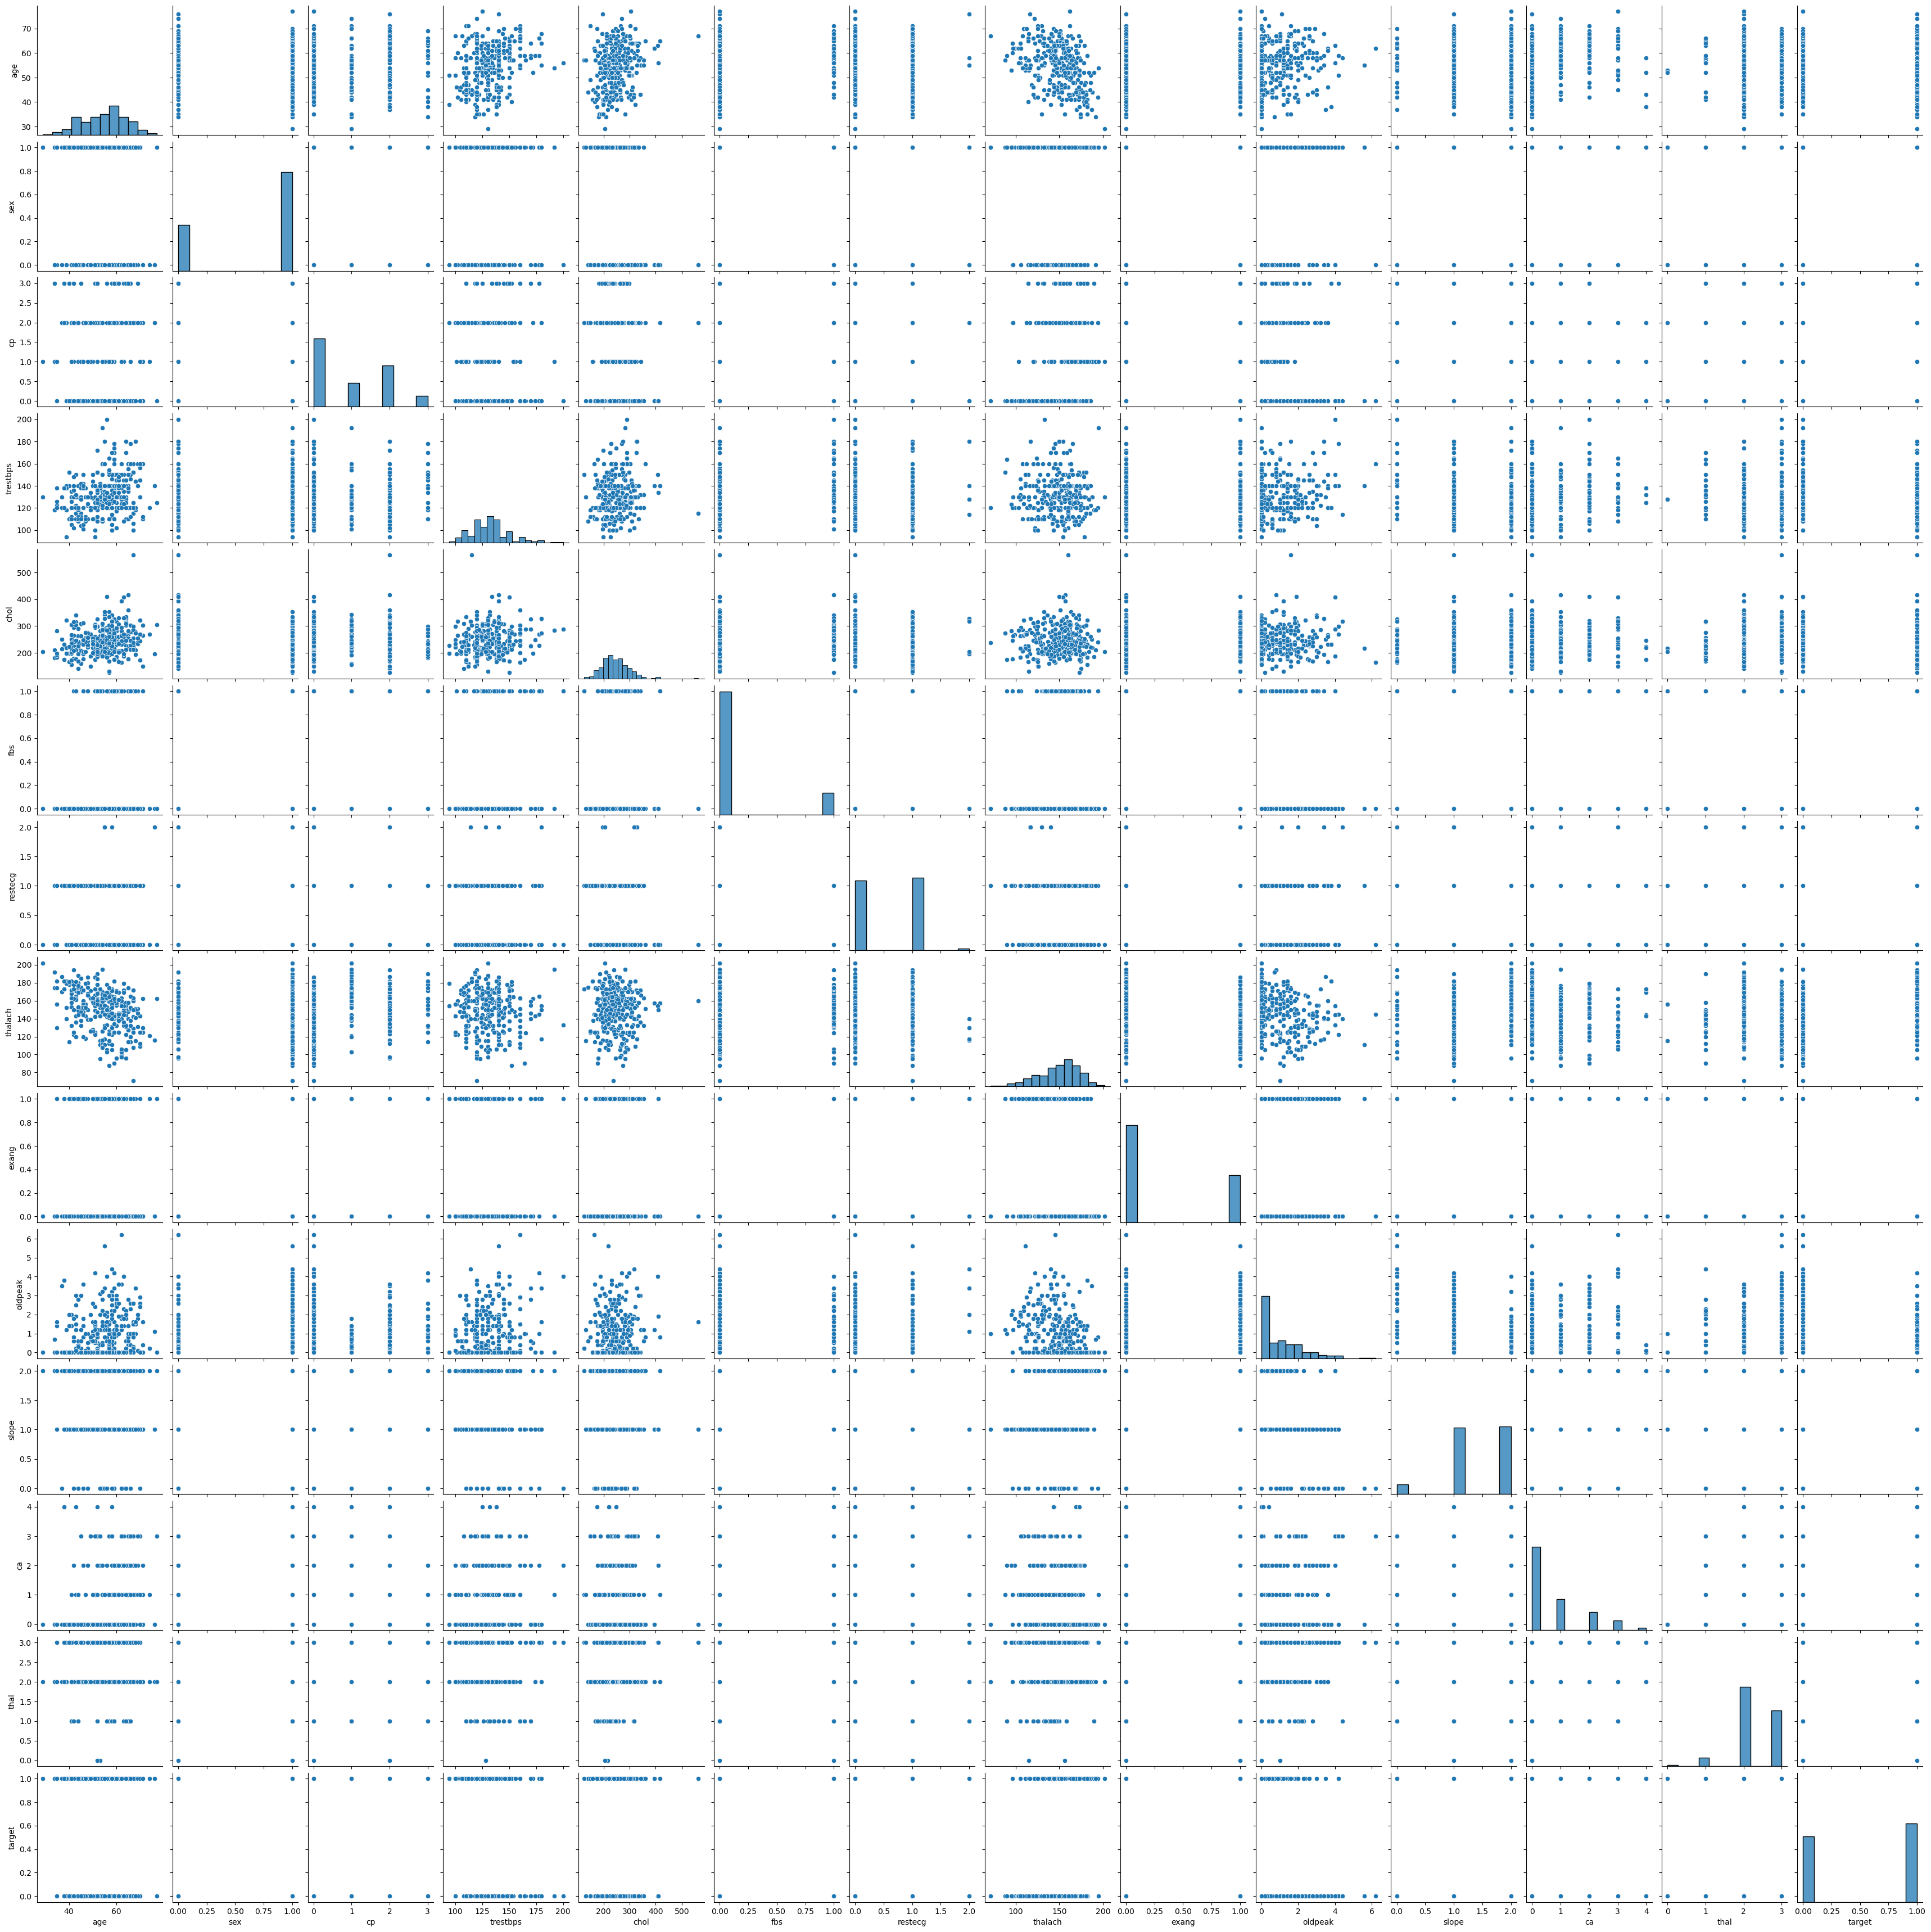

In [8]:
sns.pairplot(df)

### Correlation heatmap

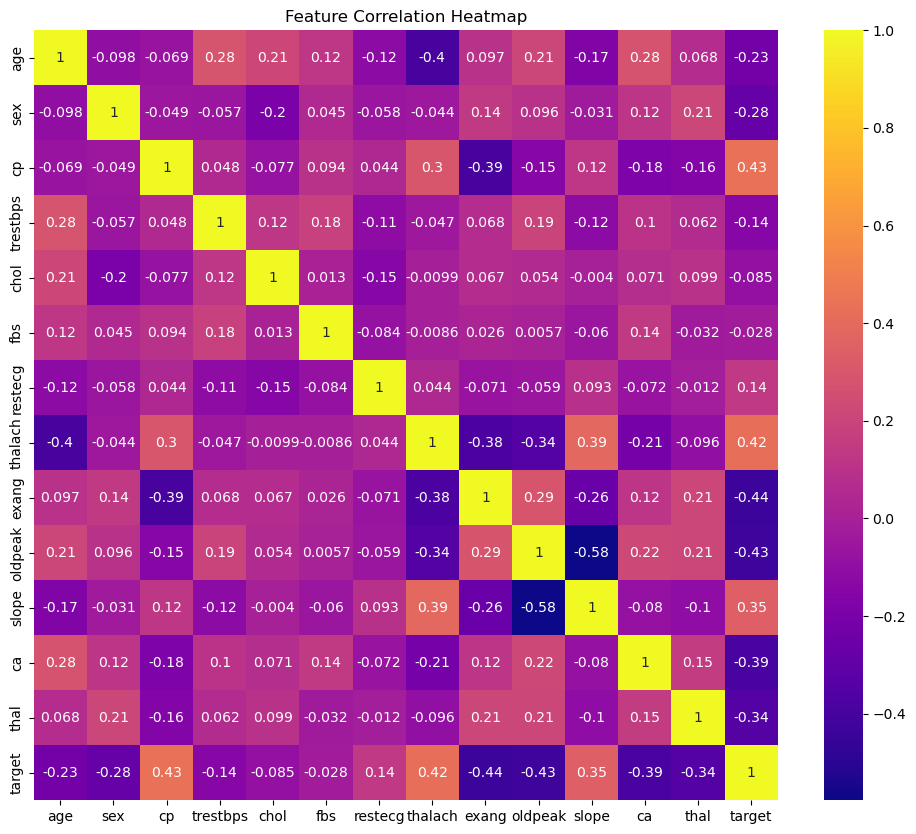

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.plasma)
plt.title("Feature Correlation Heatmap")
plt.show()

### Scatter plots

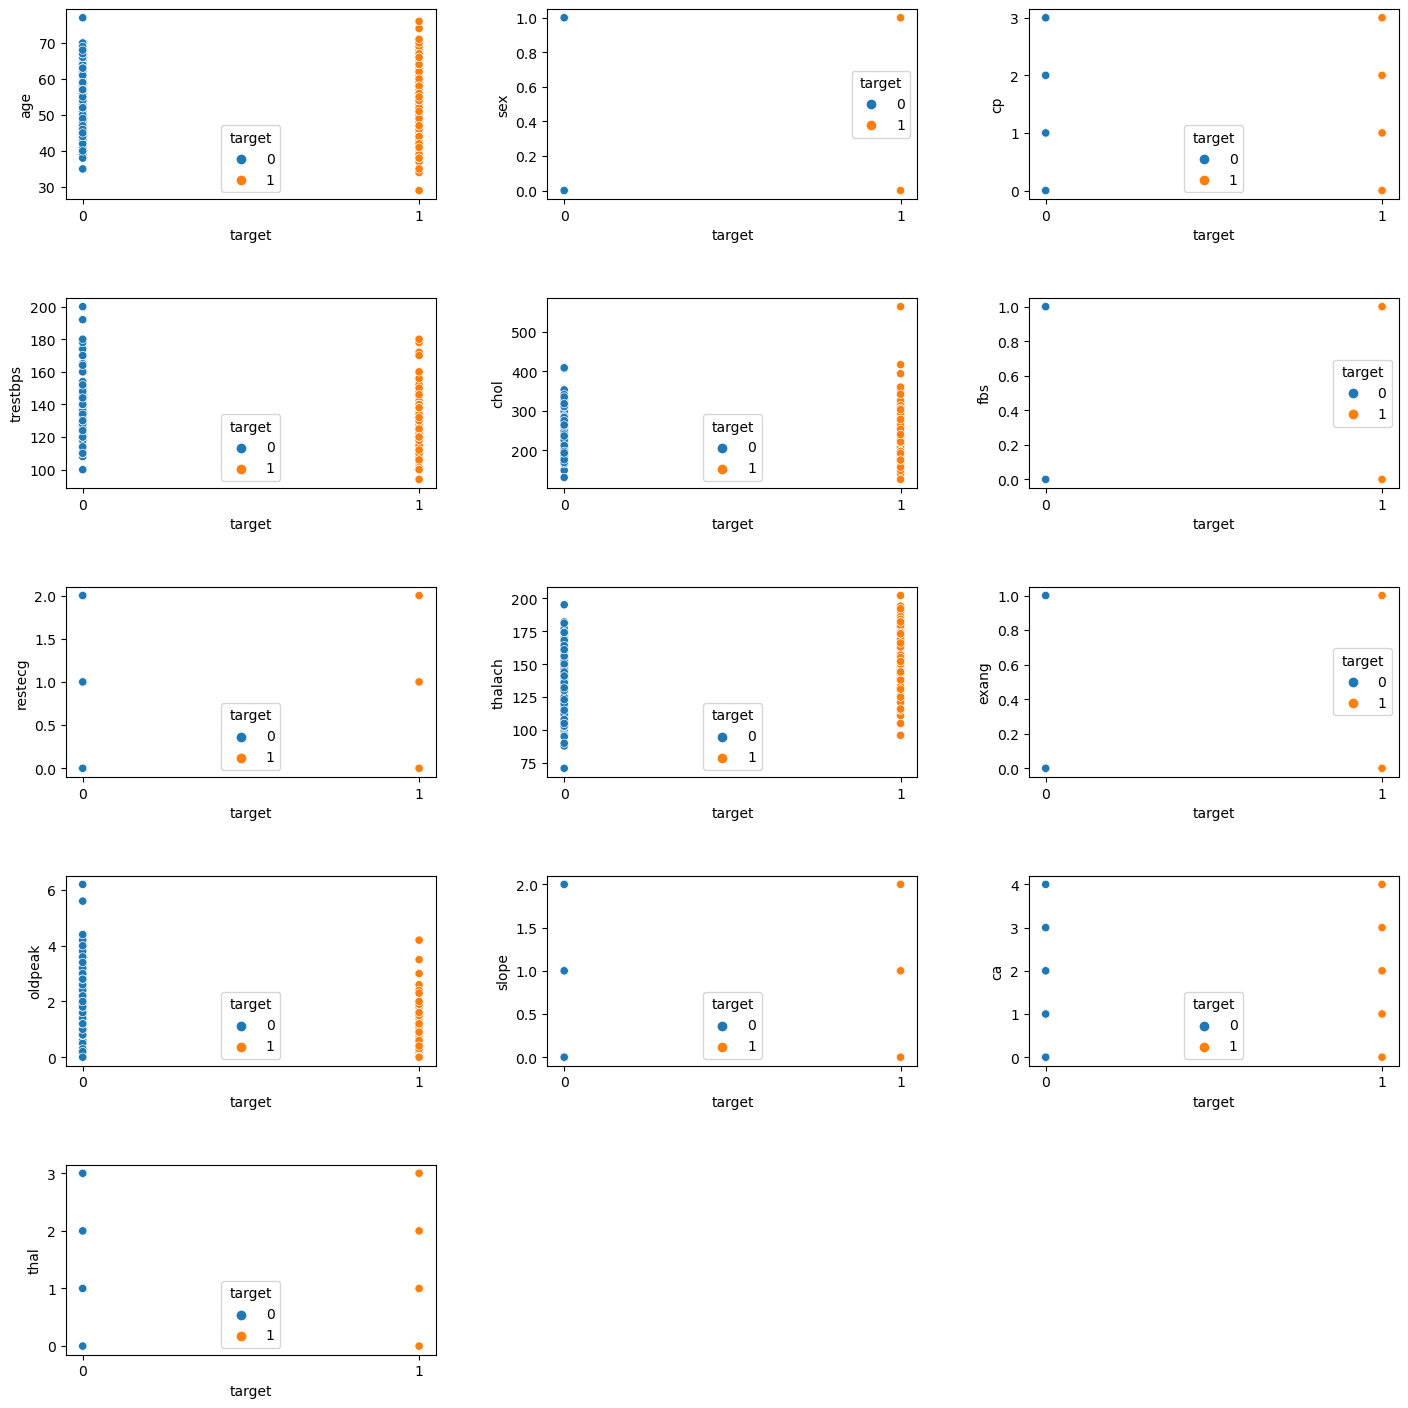

In [10]:
# Scatter plots
plt.figure(figsize=(15,15))
for i in range(len(df.columns) - 1):
    plt.subplot(5, 3, i + 1)
    sns.scatterplot(x=df['target'], y=df[df.columns[i]], hue=df['target'])
    plt.xticks([0, 1])
plt.tight_layout(pad=4.0)
plt.show()


### Count plot

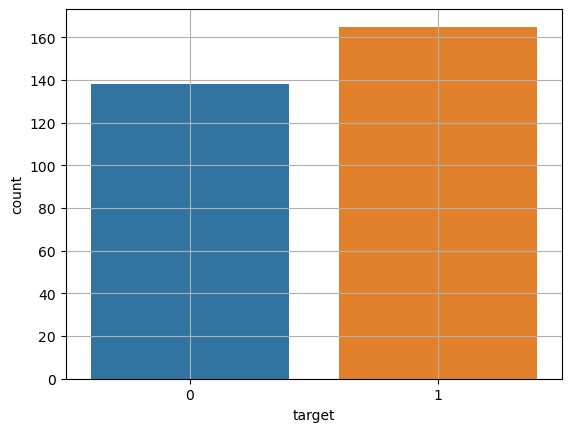

In [12]:
# count plot for target 
sns.countplot(x=df['target'],data=df)
plt.grid()

## Data preparation

In [13]:
x = df.drop('target', axis=1)
y = df['target']


In [14]:
# spliting data into training and testing
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

## Feature Scaling

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model training

### Logistic regression

In [16]:
# making a class of Logistic regression
lr_model = LogisticRegression(max_iter=1000)


In [17]:
# fitting data into model to make prediction
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

### DecisionTreeClassifier

In [18]:
# making a class of Decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)


In [19]:
# fiting data into model to make pridiction
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

## Evaluation

In [20]:
# accuracy score of each model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Logistic Regression Accuracy: 0.8947368421052632
Decision Tree Accuracy: 0.75


### confusion matrices

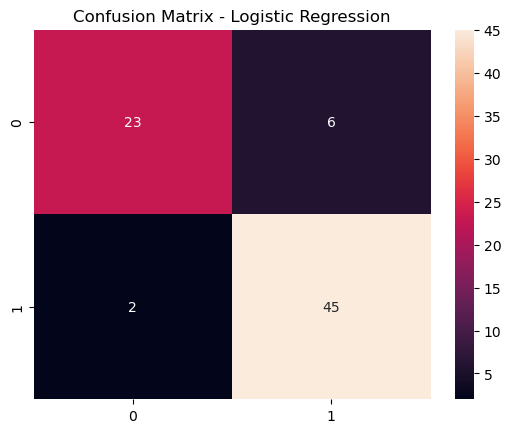

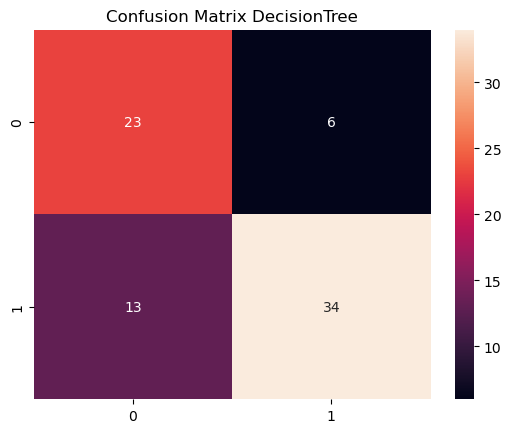

In [21]:
# Confusion Matrix Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# # Confusion Matrix DecisionTree
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
plt.title("Confusion Matrix DecisionTree")
plt.show()

## ROC Curve

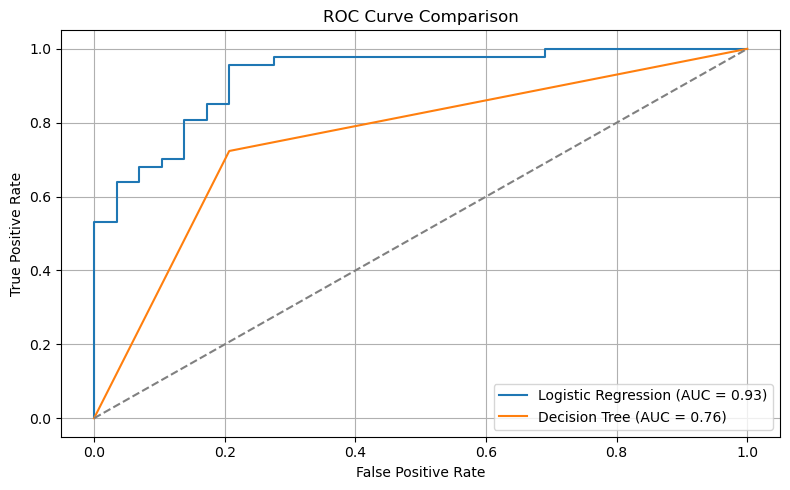

Logistic Regression ROC AUC: 0.9266324284666178
Decision Tree ROC AUC: 0.7582538517975055


In [22]:
# # ROC Curve Logistic Regression and Decision Tree
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve points
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

# Plot both ROC curves
plt.figure(figsize=(8, 5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_prob_dt):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print AUC scores
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Decision Tree ROC AUC:", roc_auc_score(y_test, y_prob_dt))


## Feature Importance

 Logistic Regression - Feature Importance:

     Feature  Importance
2         cp    0.838157
9    oldpeak   -0.716416
1        sex   -0.656111
11        ca   -0.631670
12      thal   -0.594856
7    thalach    0.413092
8      exang   -0.336943
10     slope    0.316658
3   trestbps   -0.294217
6    restecg    0.159783
5        fbs    0.133918
0        age   -0.131381
4       chol   -0.123986

 Decision Tree - Feature Importance:

     Feature  Importance
12      thal    0.249720
0        age    0.118254
2         cp    0.114165
9    oldpeak    0.110689
11        ca    0.094077
7    thalach    0.074567
3   trestbps    0.065935
4       chol    0.058474
6    restecg    0.038125
10     slope    0.034857
8      exang    0.023023
1        sex    0.018113
5        fbs    0.000000


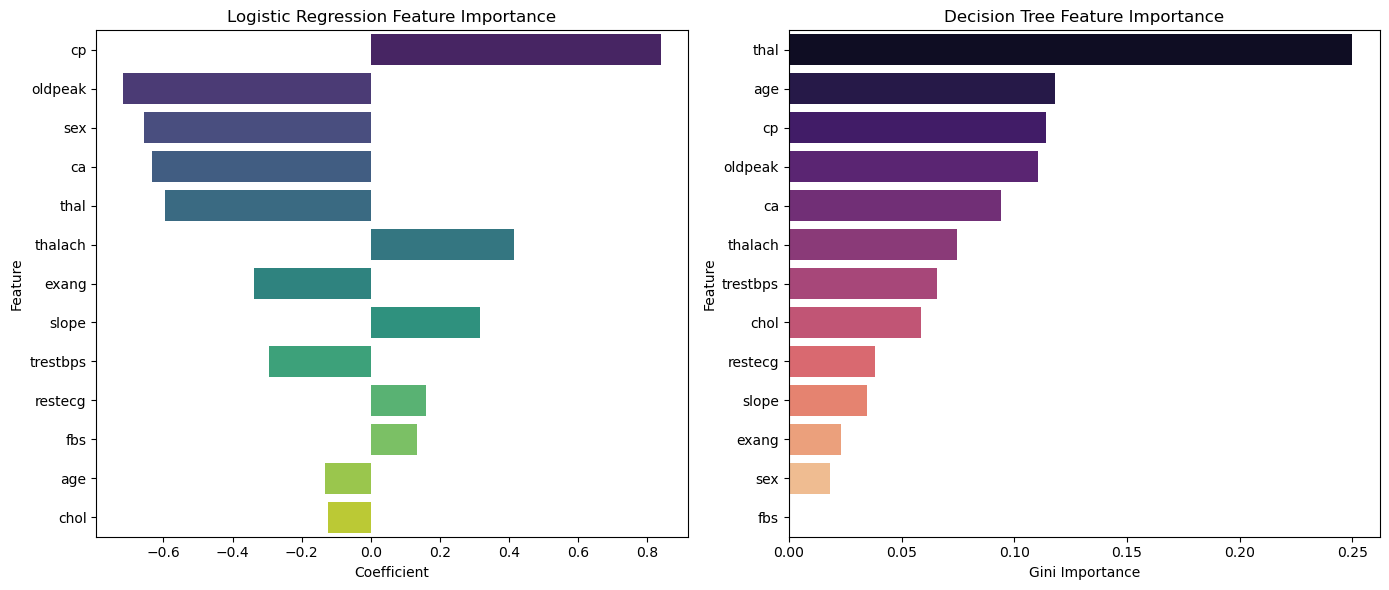

In [24]:
# important features 
# Logistic Regression
lr_importance = lr_model.coef_[0]
feature_names = x.columns

lr_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lr_importance
}).sort_values(by='Importance', key=abs, ascending=False)

print(" Logistic Regression - Feature Importance:\n")
print(lr_df)

#Decision Tree 
dt_importance = dt_model.feature_importances_

dt_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_importance
}).sort_values(by='Importance', ascending=False)

print("\n Decision Tree - Feature Importance:\n")
print(dt_df)

# Plot both for comparison
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Logistic Regression
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=lr_df, palette='viridis')
plt.title("Logistic Regression Feature Importance")
plt.xlabel("Coefficient")

# Decision Tree
plt.subplot(1, 2, 2)
sns.barplot(x='Importance', y='Feature', data=dt_df, palette='magma')
plt.title("Decision Tree Feature Importance")
plt.xlabel("Gini Importance")

plt.tight_layout()
plt.show()
